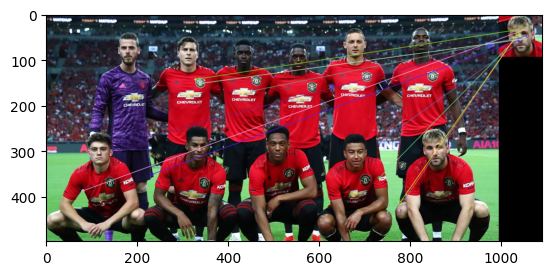

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Gunakan gambar yang ada pada laptop masing-masing
img1 = cv2.imread('mU2.jpg') # gambar yang dituju
img2 = cv2.imread('shaw.jpg') # gambar yang dicari

# Ubah ke citra keabuan
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Buat objek detektor
orb = cv2.ORB_create()

# Mencari keypoints dan deskriptor dengan ORB
kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)

# Buat objek matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Lakukan pencocokan descriptor dengan metode brute force
matches = bf.match(des1, des2)

# Urutkan berdasarkan jarak (nilai kecocokan)
matches = sorted(matches, key=lambda x: x.distance)

# Ambil hanya beberapa pasangan yang paling baik
good_matches = matches[:10]

# Gambar hasil pencocokan pada gambar baru (IMG3)
img3 = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Tampilkan gambar
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.show()
